In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('train_results.csv').sort_values(by='percentage', ascending= True)
df

,percentage,f1_score,time,pred_result
3,0.05,0.453366,3.360000,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
4,0.10,0.589393,7.002548,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."
1,0.20,0.665236,17.210000,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."
5,0.30,0.679185,21.562644,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."
6,0.50,0.708399,36.032362,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2,0.60,0.705196,42.040000,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
7,0.80,0.709100,57.842247,"[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."
0,1.00,0.712997,70.120000,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ..."


In [60]:
test_data = pd.read_csv("test_tdf.csv")
test_data

,Unnamed: 0,dataset_name,text,label_name,label_value,label_definition,source,language
0,200418,EDOS,YOUR BOY HITLER WAS A LOSERGOT HIS CLOCK CLEANED,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
1,203170,EDOS,Skinny jeans are an abomination I rarely even ...,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
2,195615,EDOS,No Never There was a post here not too long ag...,label_sexist,1,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
3,196524,EDOS,AP journalism pros to remove the mans uterus a...,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
4,210084,EDOS,Shes stuffing her emails in his jacket,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
...,...,...,...,...,...,...,...,...
3995,203636,EDOS,Poor girl Shes never had to do any work in a r...,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
3996,201468,EDOS,Watching your mom get fucked by your uncle Fuc...,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
3997,206619,EDOS,Chadsby definitionhave that quality since birt...,label_sexist,1,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng
3998,190956,EDOS,yes maam I will just sit here in the corner wi...,label_sexist,0,TASK A - Binary Sexism Detection: a two-class ...,"Gab, @Reddit",eng


## Data Cleaning

## Result Visualisation

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import ast

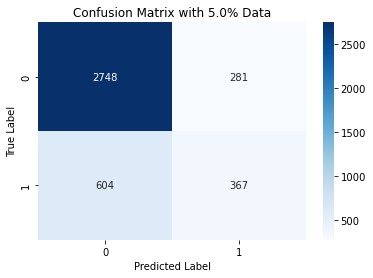

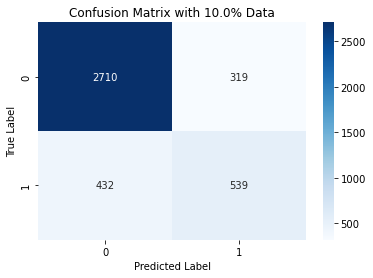

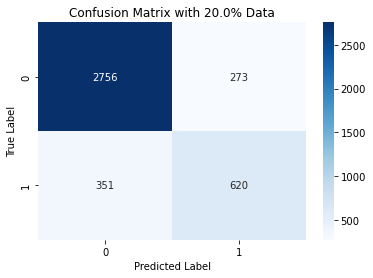

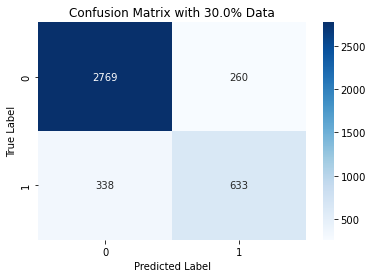

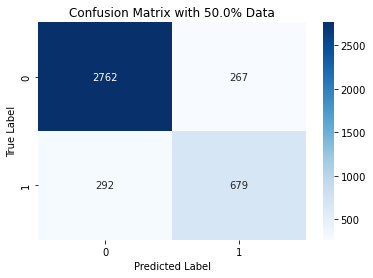

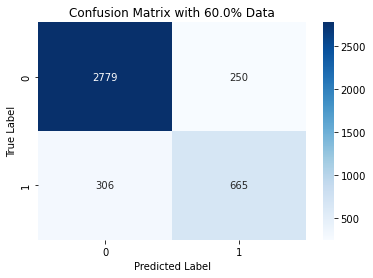

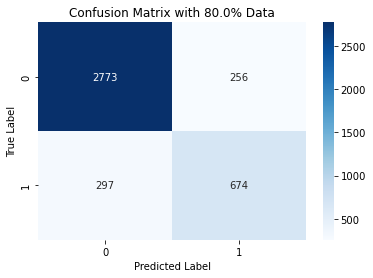

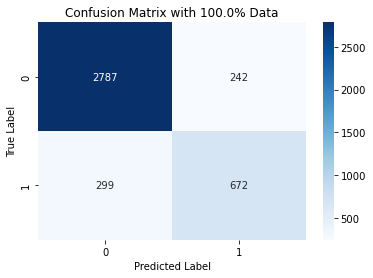

In [62]:
for idx, row in df.iterrows():
    pred =  ast.literal_eval(row['pred_result'])
    cm = confusion_matrix(test_data['label_value'], pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.title(f"Confusion Matrix with {row['percentage'] * 100}% Data")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.savefig(f"visual/cm_perc_{row['percentage']}.png")

    plt.show()


In [63]:
df.columns

Index(['percentage', 'f1_score', 'time', 'pred_result'], dtype='object')

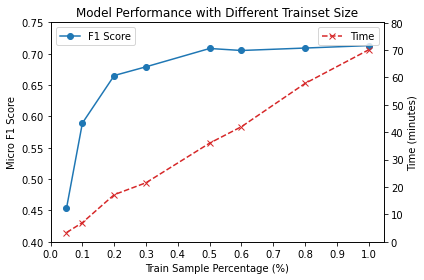

In [64]:
# Step 2: Set up the plot with dual y-axes
fig, ax1 = plt.subplots()

# Step 3: Plot the f1_score on the first y-axis
ax1.set_xlabel('Train Sample Percentage (%)')
ax1.set_ylabel('Micro F1 Score')
ax1.plot(df['percentage'], df['f1_score'], color='tab:blue', marker='o', label='F1 Score')
ax1.tick_params(axis='y')
ax1.set_ylim(0.4,0.75)

# Step 4: Create a second y-axis for the time data
ax2 = ax1.twinx()
ax2.set_ylabel('Time (minutes)')
ax2.plot(df['percentage'], df['time'], color='tab:red', marker='x', linestyle='--', label='Time')
ax2.tick_params(axis='y')
ax2.set_ylim(0, max(df['time']) + 10)

# Add a title and improve layout
plt.title('Model Performance with Different Trainset Size')
fig.tight_layout()

# Add legends to each y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xticks(np.arange(0, 1.1, 0.1))

# Step 5: Save the plot
plt.savefig('visual/percentage_vs_f1_time.png', dpi=300, bbox_inches='tight')

# Show the plot (optional, remove if not needed)
plt.show()